<a href="https://colab.research.google.com/github/irdazh/house-price-prediction/blob/main/notebooks/house_pp_eda_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction (Colab)
> **Please, do not run**

It's an exploratory notebooks since my laptop is so **bapuk**.
Guess I'll do lots of work here, before copy-pasting and make it into chunks in the local notebooks. Well, as with git things, it should be updated manually to GitHub (and rewrite, there isn't anything called edit).  
1. Data
2. EDA


```blue
!pip install pandas_profiling
from pandas_profiling import ProfileReport
import IPython

report = ProfileReport(df)
IPython.display.display(report)
```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

## 1. Data
1. Initial data loading
2. Data overview
3. Variable types
4. Summary statistics
5. NA checking

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/irdazh/house-price-prediction/refs/heads/main/data/train.csv')
df.drop(columns='Id', inplace=True)
display(df.head())
df.info()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
display(df.describe(exclude='number'),
        df.describe())

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.isnull().sum().sort_values(ascending=False).head(25)/df.shape[0]*100

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageQual,5.547945
GarageType,5.547945
GarageFinish,5.547945


## EDA
1. Data overview
2. Missing values summary
3. Data types
4. Categorical vs numerical split (?)  
  - Categorical: non-number or nunique() < 20
  - Numerical: ALL number
5. Target variable distribution
6. Feature correlation
7. Plots for Top Features
8. Outlier Detection (BP, Z-score, IQR)



In [ ]:
# Define number: all number, including low nunique()
num_cols = df.drop('SalePrice', axis=1).select_dtypes('number').columns
num_cols = list(num_cols)

# Define categorical: non number or nunique() < 25
cat_cols = df.select_dtypes('object').columns
cat_cols = list(cat_cols) + [k for k in num_cols if df[k].nunique()<25]

# There are just lots of them.
len(num_cols), len(cat_cols)

# Shouldn't we use uhm, like mutual information for this many columns?

(36, 61)

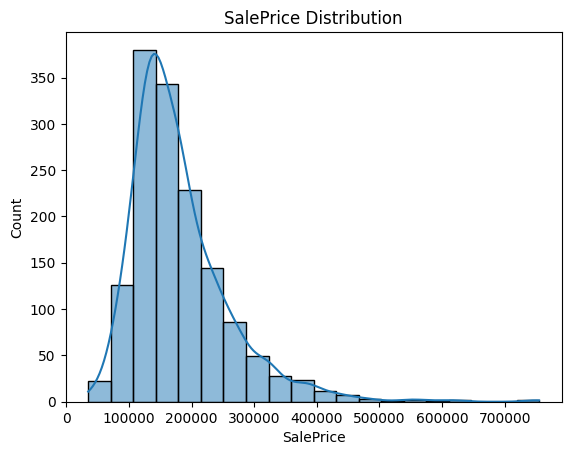

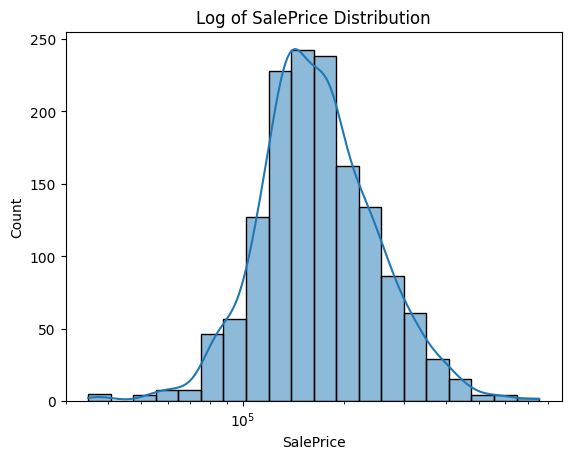

In [ ]:
# Target variable distribution
target = 'SalePrice'

sns.histplot(df[target], kde=True, bins=20)
plt.title(f'{target} Distribution')
plt.show()

sns.histplot(df[target], kde=True, log_scale=True, bins=20)
plt.title(f'Log of {target} Distribution')
plt.show()


LotArea         0.456461
OpenPorchSF     0.477561
Fireplaces      0.519247
TotRmsAbvGrd    0.532586
YearRemodAdd    0.571159
1stFlrSF        0.575408
GarageYrBlt     0.593788
TotalBsmtSF     0.602725
FullBath        0.635957
GarageArea      0.649379
YearBuilt       0.652682
GarageCars      0.690711
GrLivArea       0.731310
OverallQual     0.809829
SalePrice       1.000000
Name: SalePrice, dtype: float64


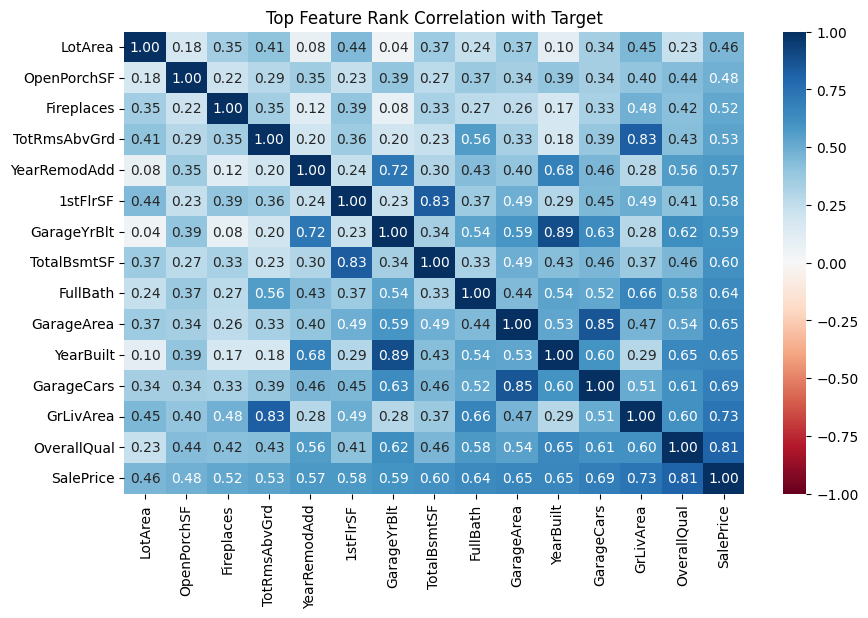

In [ ]:
# Correlation matrix (numerical only)
corr = df[num_cols+[target]].corr(method='spearman')
top_index = abs(corr[target]).sort_values().sort_values().tail(15).index

print(corr[target][top_index])

plt.figure(figsize=(10, 6))
sns.heatmap(df[top_index].corr(method='spearman'), annot=True, cmap="RdBu", fmt=".2f", vmin=-1)
plt.title("Top Feature Rank Correlation with Target")
plt.show()

**Some correlated**
- GrLivArea, TotRmsAbvGrd
- GarageCars, GarageArea
- TotalBsmtSF, 1stFlrSF

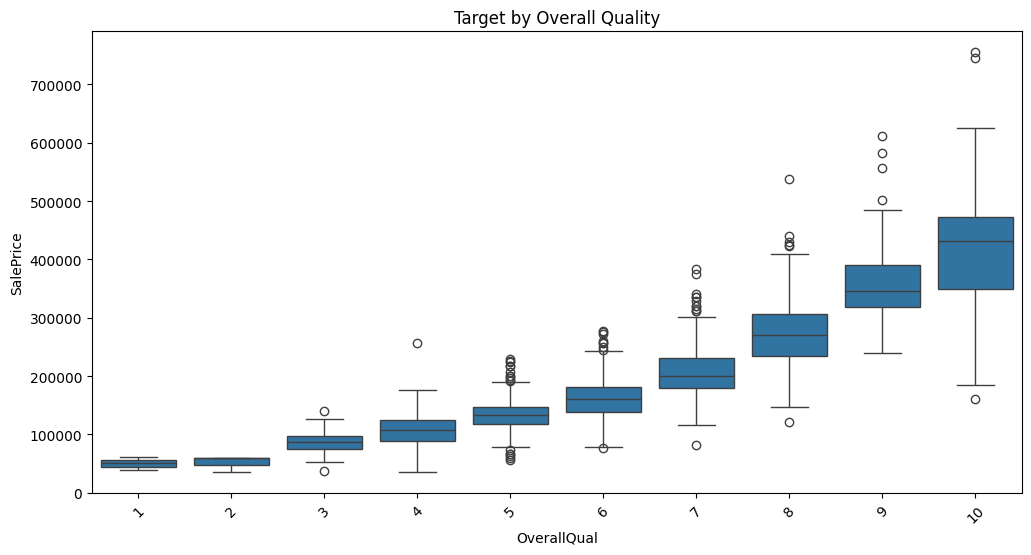

In [ ]:
# Boxplot example (categorical vs target)
# Try: Neighborhood, OverallQual, etc. — change as needed
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='OverallQual', y=target)
plt.xticks(rotation=45)
plt.title("Target by Overall Quality")
plt.show()


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
BldgType         0.000000
dtype: float64


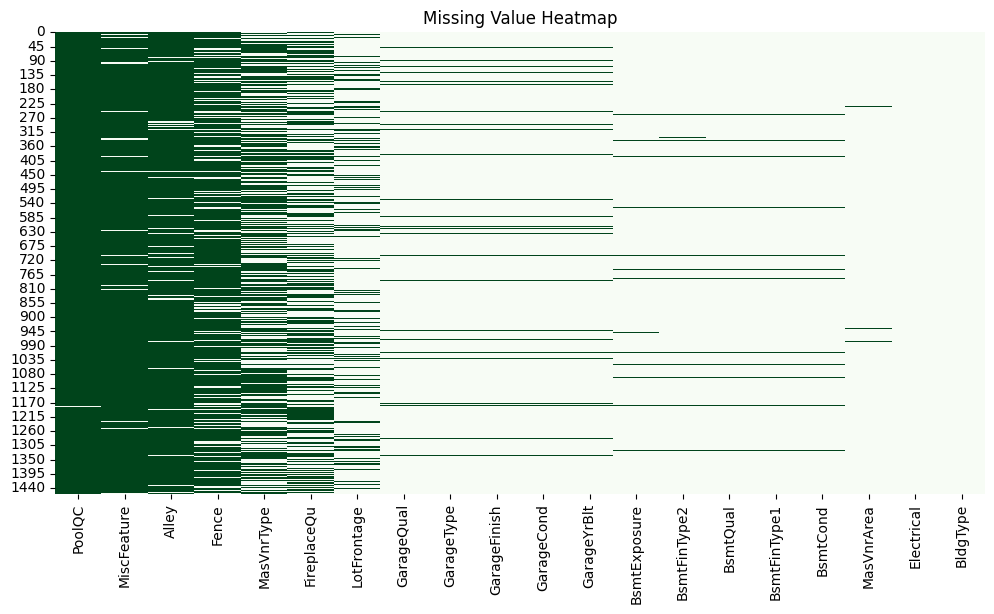

In [ ]:
# Missing value heatmap (optional)

df_mis = df.isnull().sum().sort_values(ascending=False).head(20)/df.shape[0]*100
print(df_mis)


plt.figure(figsize=(12, 6))
sns.heatmap(df[df_mis.index].isnull(), cbar=False, cmap='Greens')
plt.title("Missing Value Heatmap")
plt.show()

### Template Viz
1. both categorical --> pd.crosstab(), bar chart, heatmap
2. categorical vs numeric --> boxen plot, mutual info
3. both numeric --> (rank) correlation (done)
4. ALL --> just use mutual info will you?

### Plan
1. Choose the best 20 based on mutual information
2. Then, look at the uhm you know, corr, and then remove highly correlated things over there.
3. Done.

In [ ]:
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    # Impute NaN using median (for numeric, cuz for disc already factorize to -1)
    X.fillna(X.median(), inplace=True)
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=2)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

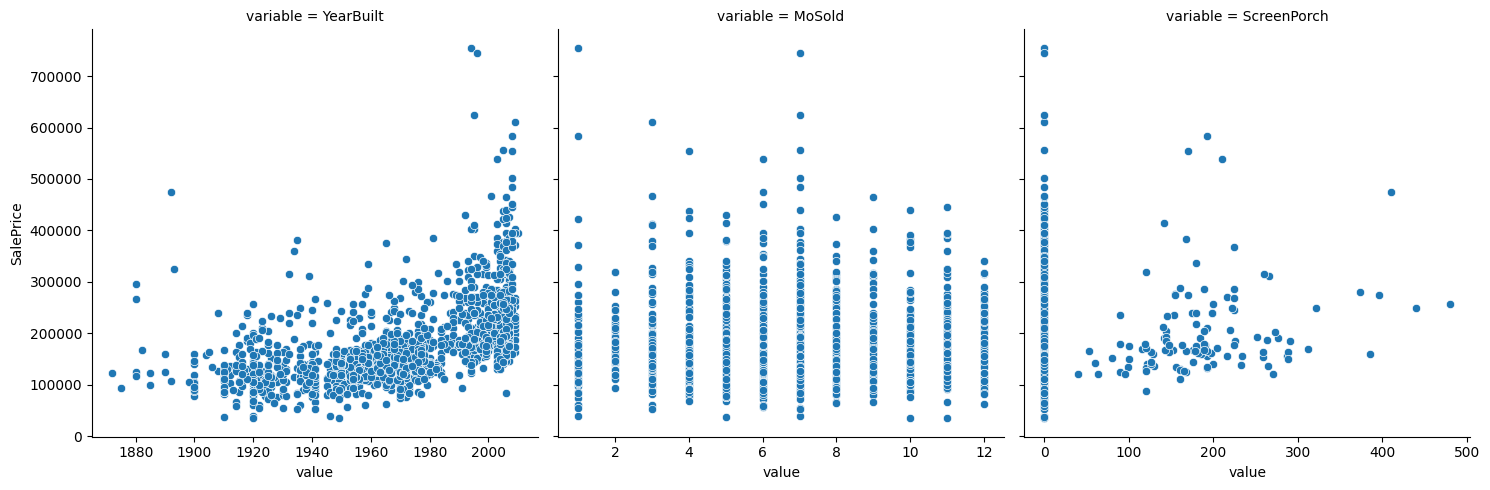

In [ ]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
)

OverallQual     0.570843
Neighborhood    0.532090
GarageArea      0.497461
GrLivArea       0.432225
YearBuilt       0.409581
TotalBsmtSF     0.397428
LotArea         0.393363
GarageCars      0.356664
ExterQual       0.331919
KitchenQual     0.327171
BsmtQual        0.323148
GarageYrBlt     0.294548
1stFlrSF        0.281021
MSSubClass      0.277508
YearRemodAdd    0.274846
GarageFinish    0.263334
FullBath        0.262568
TotRmsAbvGrd    0.218091
GarageType      0.217679
FireplaceQu     0.215234
Name: MI Scores, dtype: float64


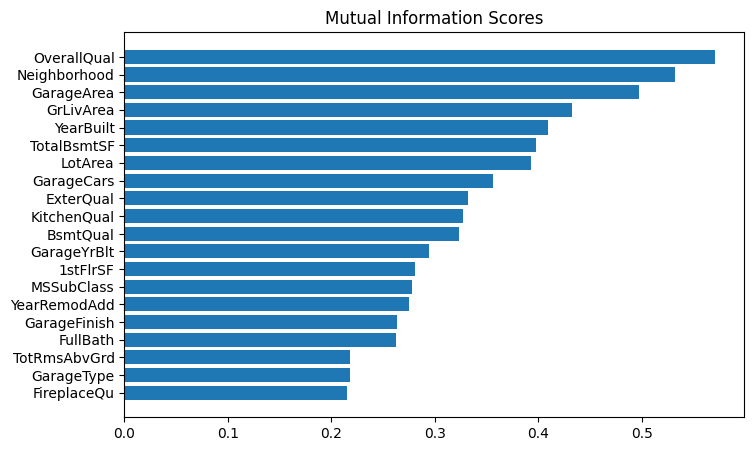

In [ ]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

In [ ]:
len(cat_cols)

61

In [ ]:
# ## General violinplot
# # 61 so much yeah. 65 = 7*9?
# cat_cols

# fig, axes = plt.subplots(9, 7, figsize=(20, 28), sharey=False)
# axes = axes.ravel()

# for i, var in enumerate(cat_cols):
#     sns.violinplot(data=df.sample(500, random_state=0), y='SalePrice', x=var, ax=axes[i], palette='Paired', hue=var, legend=False)
#     axes[i].set_title(f'SalePrice by {var}', fontsize=12, fontweight='bold')
#     axes[i].set_xlabel(None)
#     axes[i].tick_params(axis='x', rotation=45)
#     pass
# plt.tight_layout()


In [ ]:
mi_scores.head(20).index

Index(['OverallQual', 'Neighborhood', 'GarageArea', 'GrLivArea', 'YearBuilt',
       'TotalBsmtSF', 'LotArea', 'GarageCars', 'ExterQual', 'KitchenQual',
       'BsmtQual', 'GarageYrBlt', '1stFlrSF', 'MSSubClass', 'YearRemodAdd',
       'GarageFinish', 'FullBath', 'TotRmsAbvGrd', 'GarageType',
       'FireplaceQu'],
      dtype='object')

## Data Cleaning
1. Handle missing value: drop for high missing value, impute using median and None
2. Convert categorical variable: using OrdinalEncoder
3. Feature Engineering: got any idea? BldgType x GrLivArea

```bash
X_1["Spaciousness"] = (X["FirstFlrSF"]+X["SecondFlrSF"])/X["TotRmsAbvGrd"]
X_1["TotalOutsideSF"] = X["WoodDeckSF OpenPorchSF EnclosedPorch Threeseasonporch ScreenPorch".split()].sum(axis=1)

# One-hot encode BldgType. Use `prefix="Bldg"` in `get_dummies`
X_2 = pd.get_dummies(X.BldgType, prefix="Bldg")
# Multiply
X_2 = X_2.mul(X.GrLivArea, axis=0)

kolom = "WoodDeckSF OpenPorchSF EnclosedPorch Threeseasonporch ScreenPorch".split()
X_3["PorchTypes"] = X[kolom].gt(0).sum(axis=1)

# YOUR CODE HERE
X_4["MSClass"] = [j.split("_")[0] for j in X["MSSubClass"]]
X_4["MSClass"] = X.MSSubClass.str.split("_", expand=True)[0]

# YOUR CODE HERE
X_5["MedNhbdArea"] = X.groupby("Neighborhood")["GrLivArea"].transform("median")
```
4. Save the clean dataset:

**Some correlated**
- GrLivArea, TotRmsAbvGrd
- GarageCars, GarageArea
- TotalBsmtSF, 1stFlrSF
- YearBuilt, GarageYearBuilt (drop this only)

**Well, cuz of some the things I do**

- eval using RMSE of log sale price.
- giving equal effect between cheap and expensive one.


## Modeling
- Baseline
- Hyperparameter Tuning
- Feature Selection



### What will you do today?
How about doing nothin.
- Please don't. Please do nothing.
- Dead batteries are normal. It's a fun design?
- Real, keeps you alert.


### Let's do data preprocessing in a pipeline.
Inside a pipeline, here what we gonna do:
1. handle missing value > remove 5 cols, then impute the other.
2. imputation
3. feature engineering.
4. and else dude, else. okay? right?
5. let's just do.

## Data Preprocessing


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error


In [ ]:
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

# remove high missing cols
X.drop('PoolQC MiscFeature Alley Fence'.split(), axis=1, errors='ignore')

num_var = X.select_dtypes(include='number').columns
ord_var = X.select_dtypes(include='object').columns
nom_var = ['BldType']

In [ ]:
# Feature engineering from kaggle's learn
# rooms' spaciousness, outside area, building type x ground area
def feature_eng(df):
  X = df.copy()

  outside = "WoodDeckSF OpenPorchSF EnclosedPorch Threeseasonporch ScreenPorch".split()

  X["Spaciousness"] = (X["FirstFlrSF"]+X["SecondFlrSF"])/X["TotRmsAbvGrd"].replace(0, np.nan)
  X["TotalOutsideSF"] = X[outside].sum(axis=1)
  X["PorchTypes"] = X[outside].gt(0).sum(axis=1)
  X["MSSubClass"] = X.MSSubClass.str.split("_", expand=True)[0]

  # must use custom transformer: GroupMeanEncoder
  # X["MedNhbdArea"] = X.groupby("Neighborhood")["GrLivArea"].transform("median")

  ## it's prone to error, and should use uhm.
  # X3 = pd.get_dummies(X.BldgType, prefix="Bldg", )
  # X3 = X3.mul(X.GrLivArea, axis=0)
  # join X3 with X
  return X

feature_eng = FunctionTransformer(feature_eng)

In [ ]:
# preprocess for numerical columns
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

nom_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(transformers=[
    ('num', num_pipe, num_var),
    ('ord', ord_pipe, ord_var)
    # ('nom', nom_pipe, nom_var)
])


# full_pipe = Pipeline([
#     ('eng', feature_eng),
#     ('pre', preprocess)
# ])


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as imbpipeline
import pandas as pd
from sklearn.metrics import mean_squared_error, make_scorer, root_mean_squared_log_error, root_mean_squared_error

# FOLD
kf = KFold(n_splits=5, random_state=0, shuffle=True)

In [ ]:
# custom scorer
def rmse_log(yt, yp):
  lt = np.log1p(yt)
  lp = np.log1p(yp)
  return np.sqrt(np.mean((lt-lp)**2))

rmse_log_scorer = make_scorer(rmse_log, greater_is_better=False)



In [ ]:
y_pred = np.random.uniform(0, 100, size=len(y))
rmse_log(y, y_pred)

np.float64(8.422868761066406)

In [ ]:
# Define a list of regression models
basic_models = [
    LinearRegression(),
    Ridge(random_state=42),
    Lasso(random_state=42),
    ElasticNet(random_state=42),
    KNeighborsRegressor(),
    RandomForestRegressor(random_state=42),
    HistGradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42),
    LGBMRegressor(random_state=42),
]

def modeling(models=basic_models):
  res = []
  for model in models:
    full_pipe = Pipeline([
        ('eng', feature_eng),
        ('pre', preprocess),
        ('reg', model)
      ])

    print(model)
    grid_search = GridSearchCV(estimator=full_pipe, param_grid = {}, cv=kf,
                                scoring = {'rmse':'neg_root_mean_squared_error',
                                           'msle1':'neg_root_mean_squared_log_error',
                                           'msle2': rmse_log_scorer},
                                refit = 'msle2', verbose=0, n_jobs=-1)

    grid_search.fit(X, y)

    # return grid_search.predict(X)

    result = {
          'model': type(model).__name__,
          'msle1': -grid_search.cv_results_['mean_test_msle1'][0],
          'rmse': -grid_search.cv_results_['mean_test_rmse'][0],
          'msle2': -grid_search.cv_results_['mean_test_msle2'][0],
          'time': grid_search.cv_results_['mean_fit_time'][0],
          'params': model.get_params()
      }

    res.append(result)
  return pd.DataFrame(res), grid_search.cv_results_

In [ ]:
res_basic, cv_basic = modeling()

LinearRegression()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Ridge(random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Lasso(random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.010e+09, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet(random_state=42)
KNeighborsRegressor()
RandomForestRegressor(random_state=42)
HistGradientBoostingRegressor(random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
LGBMRegressor(random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3300
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 74
[LightGBM] [Info] Start training from score 180921.195890
